In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cr7 = cv2.imread('../resources/img/cr7.jpg', 0)
obama = cv2.imread('../resources/img/obama.jpeg', 0)
madrid = cv2.imread('../resources/img/madrid.png', 0)

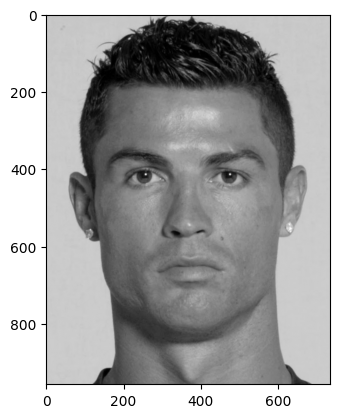

In [4]:
plt.imshow(cr7, cmap = 'grey')

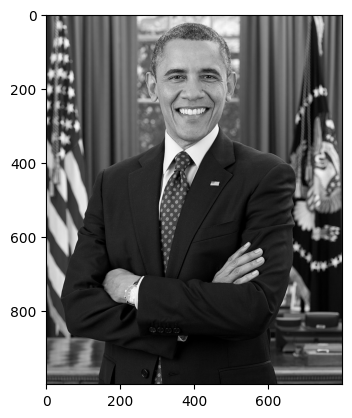

In [5]:
plt.imshow(obama, cmap = 'grey')

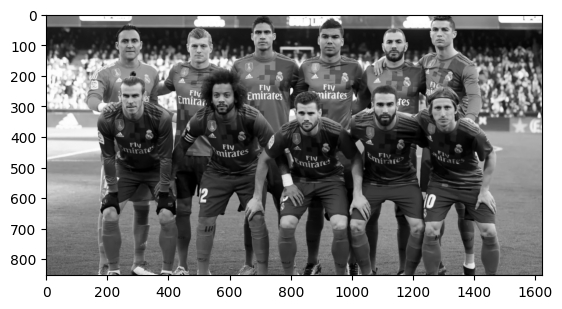

In [6]:
plt.imshow(madrid, cmap = 'grey')

# Cascade Files

## Face Cascade

In [7]:
face_cascade = cv2.CascadeClassifier('../resources/haarcascades/haarcascade_frontalface_default.xml')

In [15]:
def detectar_cara(img):
    cara = img.copy()
    face_rectangle = face_cascade.detectMultiScale(cara)

    for (x, y, w, h) in face_rectangle:
        cv2.rectangle(cara, (x, y), (x + w, y + h), (255, 255, 255), 10)
    return cara

In [16]:
resultado = detectar_cara(cr7)

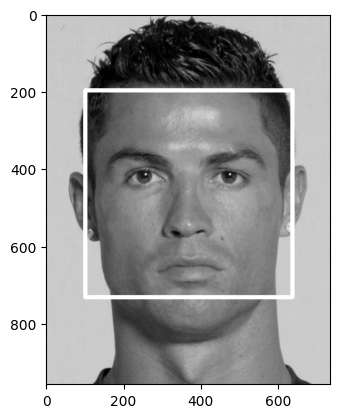

In [17]:
plt.imshow(resultado, cmap = 'grey')

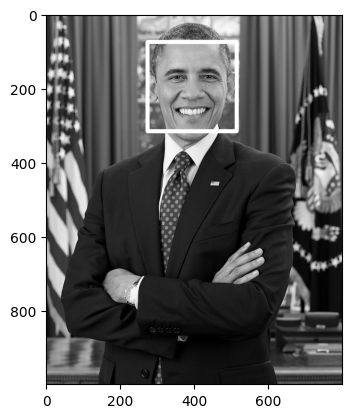

In [18]:
resultado = detectar_cara(obama)
plt.imshow(resultado, cmap = 'grey')

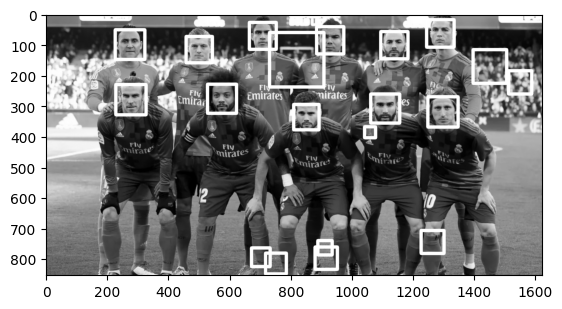

In [19]:
resultado = detectar_cara(madrid)
plt.imshow(resultado, cmap = 'grey')

### Cuando hay muchas caras el frontalface puede fallar, pero podemos modificar algunos elementos de la funcion para mejorar los resultados

In [20]:
def detectar_cara_ajustado(img):
    cara = img.copy()
    face_rectangle = face_cascade.detectMultiScale(cara, scaleFactor = 1.2, minNeighbors = 10)

    for (x, y, w, h) in face_rectangle:
        cv2.rectangle(cara, (x, y), (x + w, y + h), (255, 255, 255), 10)
    return cara

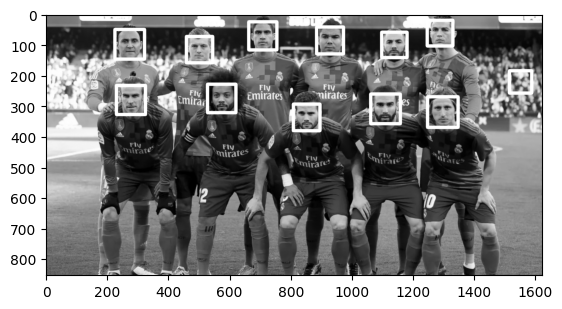

In [21]:
resultado = detectar_cara_ajustado(madrid)
plt.imshow(resultado, cmap = 'grey')

## Cascade para los Ojos

In [22]:
eye_cascade = cv2.CascadeClassifier('../resources/haarcascades/haarcascade_eye.xml')

In [23]:
def detectar_ojos(img):
    cara = img.copy()
    eyes_rectangle = eye_cascade.detectMultiScale(cara)

    for (x, y, w, h) in eyes_rectangle:
        cv2.rectangle(cara, (x, y), (x + w, y + h), (255, 255, 255), 10)
    return cara

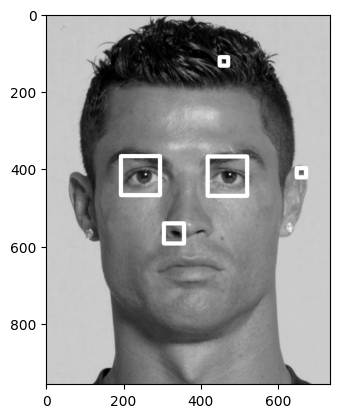

In [24]:
resultado = detectar_ojos(cr7)
plt.imshow(resultado, cmap = 'grey')

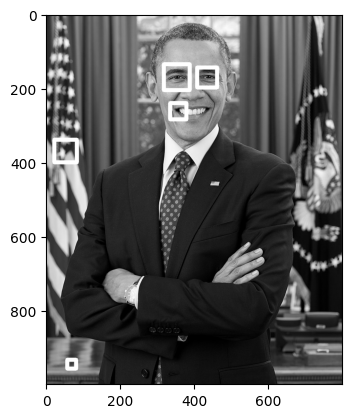

In [25]:
resultado = detectar_ojos(obama)
plt.imshow(resultado, cmap = 'grey')

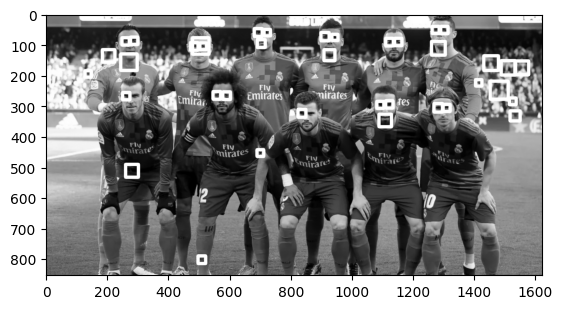

In [26]:
resultado = detectar_ojos(madrid)
plt.imshow(resultado, cmap = 'grey')

### Modificamos el multiScale para mejorar los resultados en general.

In [27]:
def detectar_ojos(img):
    cara = img.copy()
    eyes_rectangle = eye_cascade.detectMultiScale(cara, scaleFactor = 1.2, minNeighbors = 10)

    for (x, y, w, h) in eyes_rectangle:
        cv2.rectangle(cara, (x, y), (x + w, y + h), (255, 255, 255), 10)
    return cara

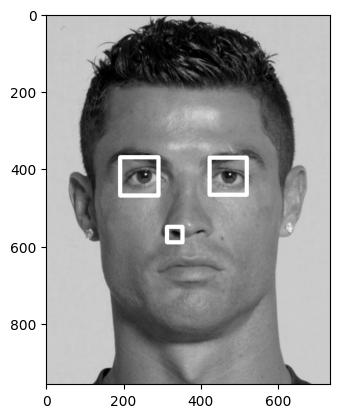

In [28]:
resultado = detectar_ojos(cr7)
plt.imshow(resultado, cmap = 'grey')

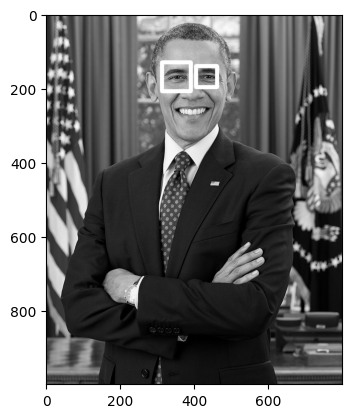

In [29]:
resultado = detectar_ojos(obama)
plt.imshow(resultado, cmap = 'grey')

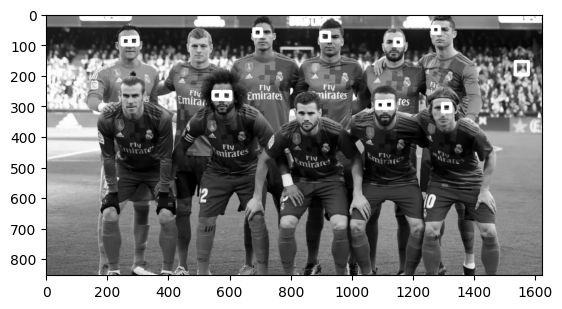

In [30]:
resultado = detectar_ojos(madrid)
plt.imshow(resultado, cmap = 'grey')

# Webcam

### Detectar Cara

In [31]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)

    frame = detectar_cara(frame)

    cv2.imshow('Detectar cara', frame)

    key = cv2.waitKey(1) & 0xFF

    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

### Detectar Ojos

In [32]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)

    frame = detectar_ojos(frame)

    cv2.imshow('Detectar cara', frame)

    key = cv2.waitKey(1) & 0xFF

    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()